In [1]:
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Load dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

In [3]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


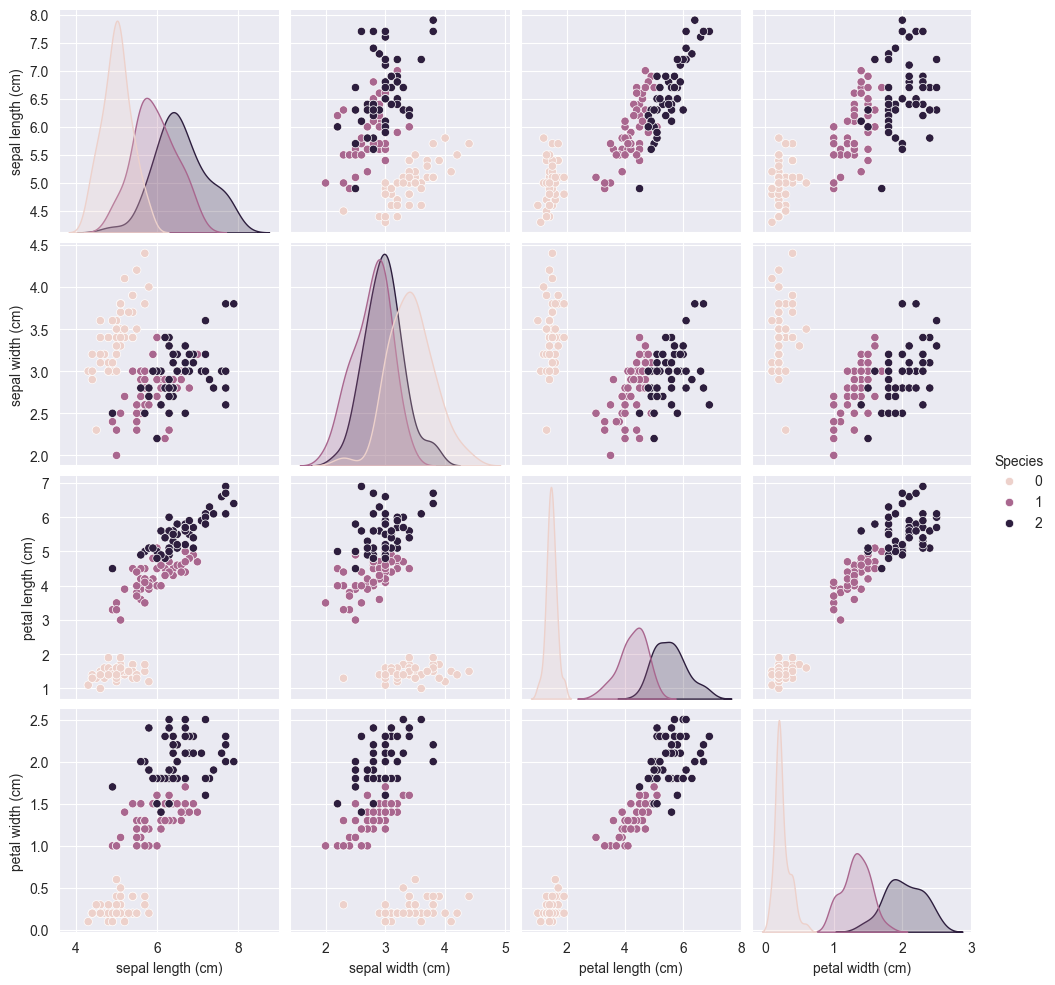

In [4]:
# Visualization
sns.pairplot(pd.concat([X, pd.Series(y, name="Species")], axis=1), hue="Species")
plt.show()


In [5]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
models = {
    "kNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(max_depth=4),
    "SVM": SVC(kernel='rbf', probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500)
}

In [7]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    probs = model.predict_proba(X_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, preds),
        "Precision": precision_score(y_test, preds, average='weighted'),
        "Recall": recall_score(y_test, preds, average='weighted'),
        "F1": f1_score(y_test, preds, average='weighted'),
        "ROC-AUC": roc_auc_score(label_binarize(y_test, classes=[0, 1, 2]), probs, multi_class='ovr')
    })


In [8]:
results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1,ROC-AUC
0,kNN,0.933333,0.944444,0.933333,0.932660,0.993333
1,Decision Tree,0.933333,0.933333,0.933333,0.933333,0.973333
2,SVM,0.966667,0.969697,0.966667,0.966583,0.996667
3,Random Forest,0.933333,0.933333,0.933333,0.933333,0.993333
4,Neural Network,0.966667,0.969697,0.966667,0.966583,0.996667
